In [ ]:
##
## This file produces the Figure 2 in the paper
## Draw trace of different kinds of dynamics
##

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Parameters ##

In [4]:
m = 1 
C = 3
dt = 0.1
nstep = 15000
niter = 50

In [5]:
# noise in the gradien t
#sigma = 0.5 #! value in original matlab file, which I think is not in line with the paper
sigma = 2 # for N(0,4), sigma * np.random.randn(...) + mu
gradUPerfect = lambda x = None: x
gradU = lambda x = None: x + np.random.randn(1) * sigma
xstart = 1
pstart = 0

In [ ]:
################# Draw discretizations of Hamiltonian dynamics separately to see more clearly ################

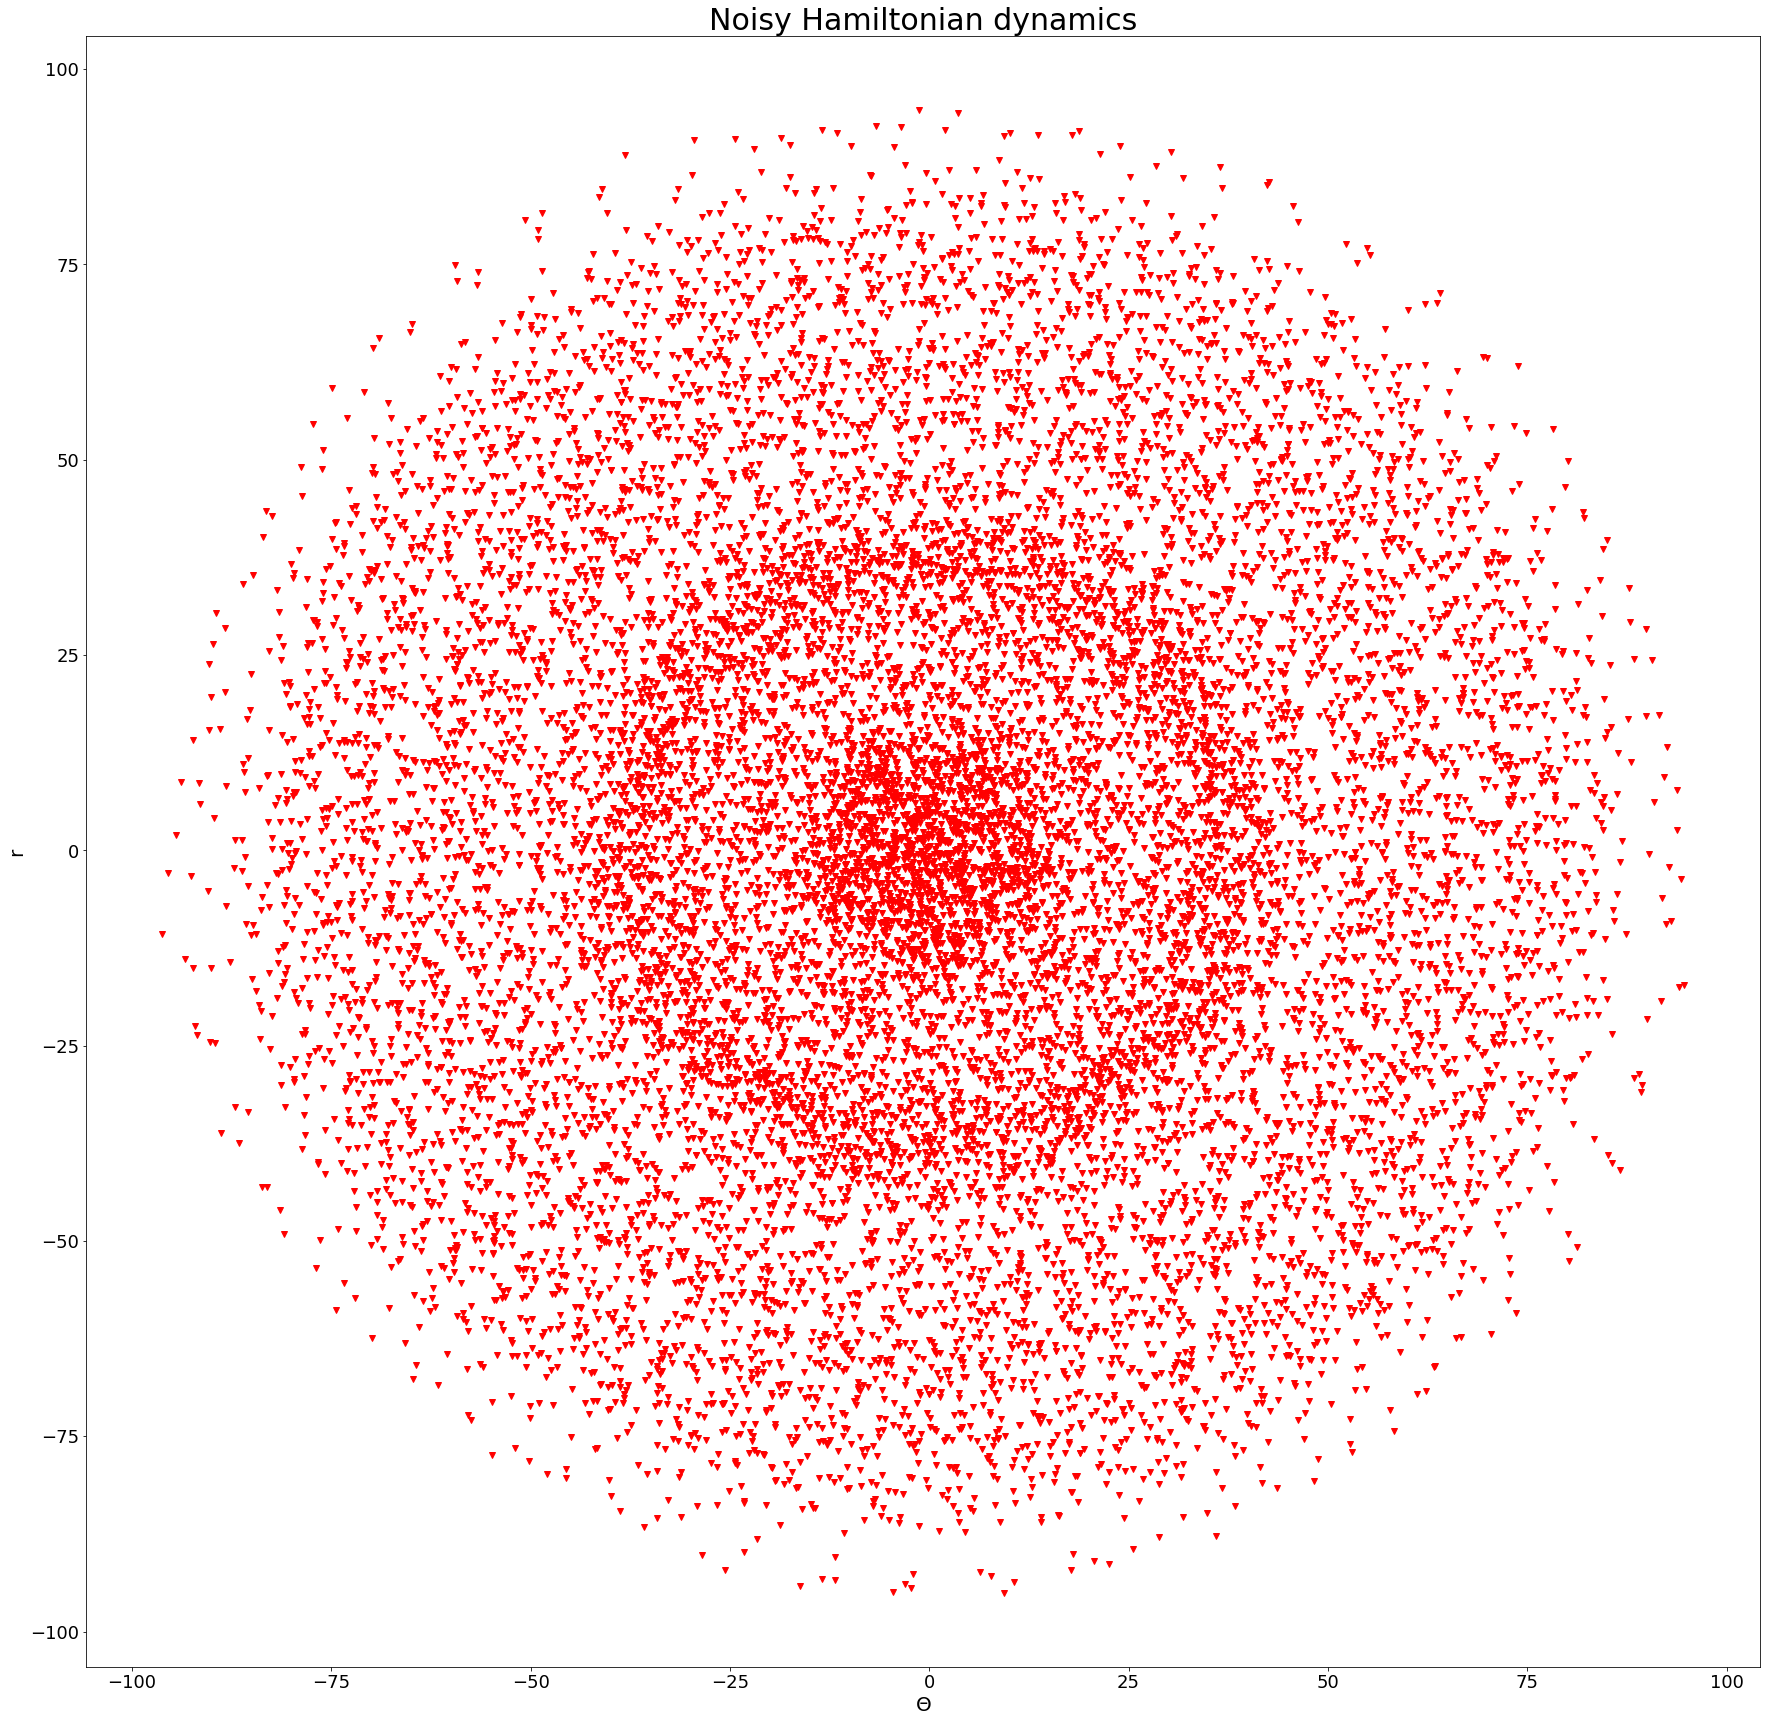

In [92]:
## Hamiltonian dynamics with noised gradient
## Set the fig parameters
plt.title('Noisy Hamiltonian dynamics', fontsize=30) # title of the fig
plt.rcParams["figure.figsize"] = [30,30] # the image size: width, length
plt.xlabel(r"${\Theta}$", fontsize=20)  # the x axis label name
plt.ylabel('r', fontsize=20)  # the x axis label name
plt.tick_params(axis='x', labelsize=18) # the x axis label size
plt.tick_params(axis='y', labelsize=18) # the y axis label size

# set random seed and variables
np.random.seed(10)
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))

# do leapfrog
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt / 2
        x = x + p / m * dt
        p = p - gradU(x) * dt / 2
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'rv')
plt.savefig('./Fig2/Fig2_HamiltonianDyNG.jpg')
plt.show()

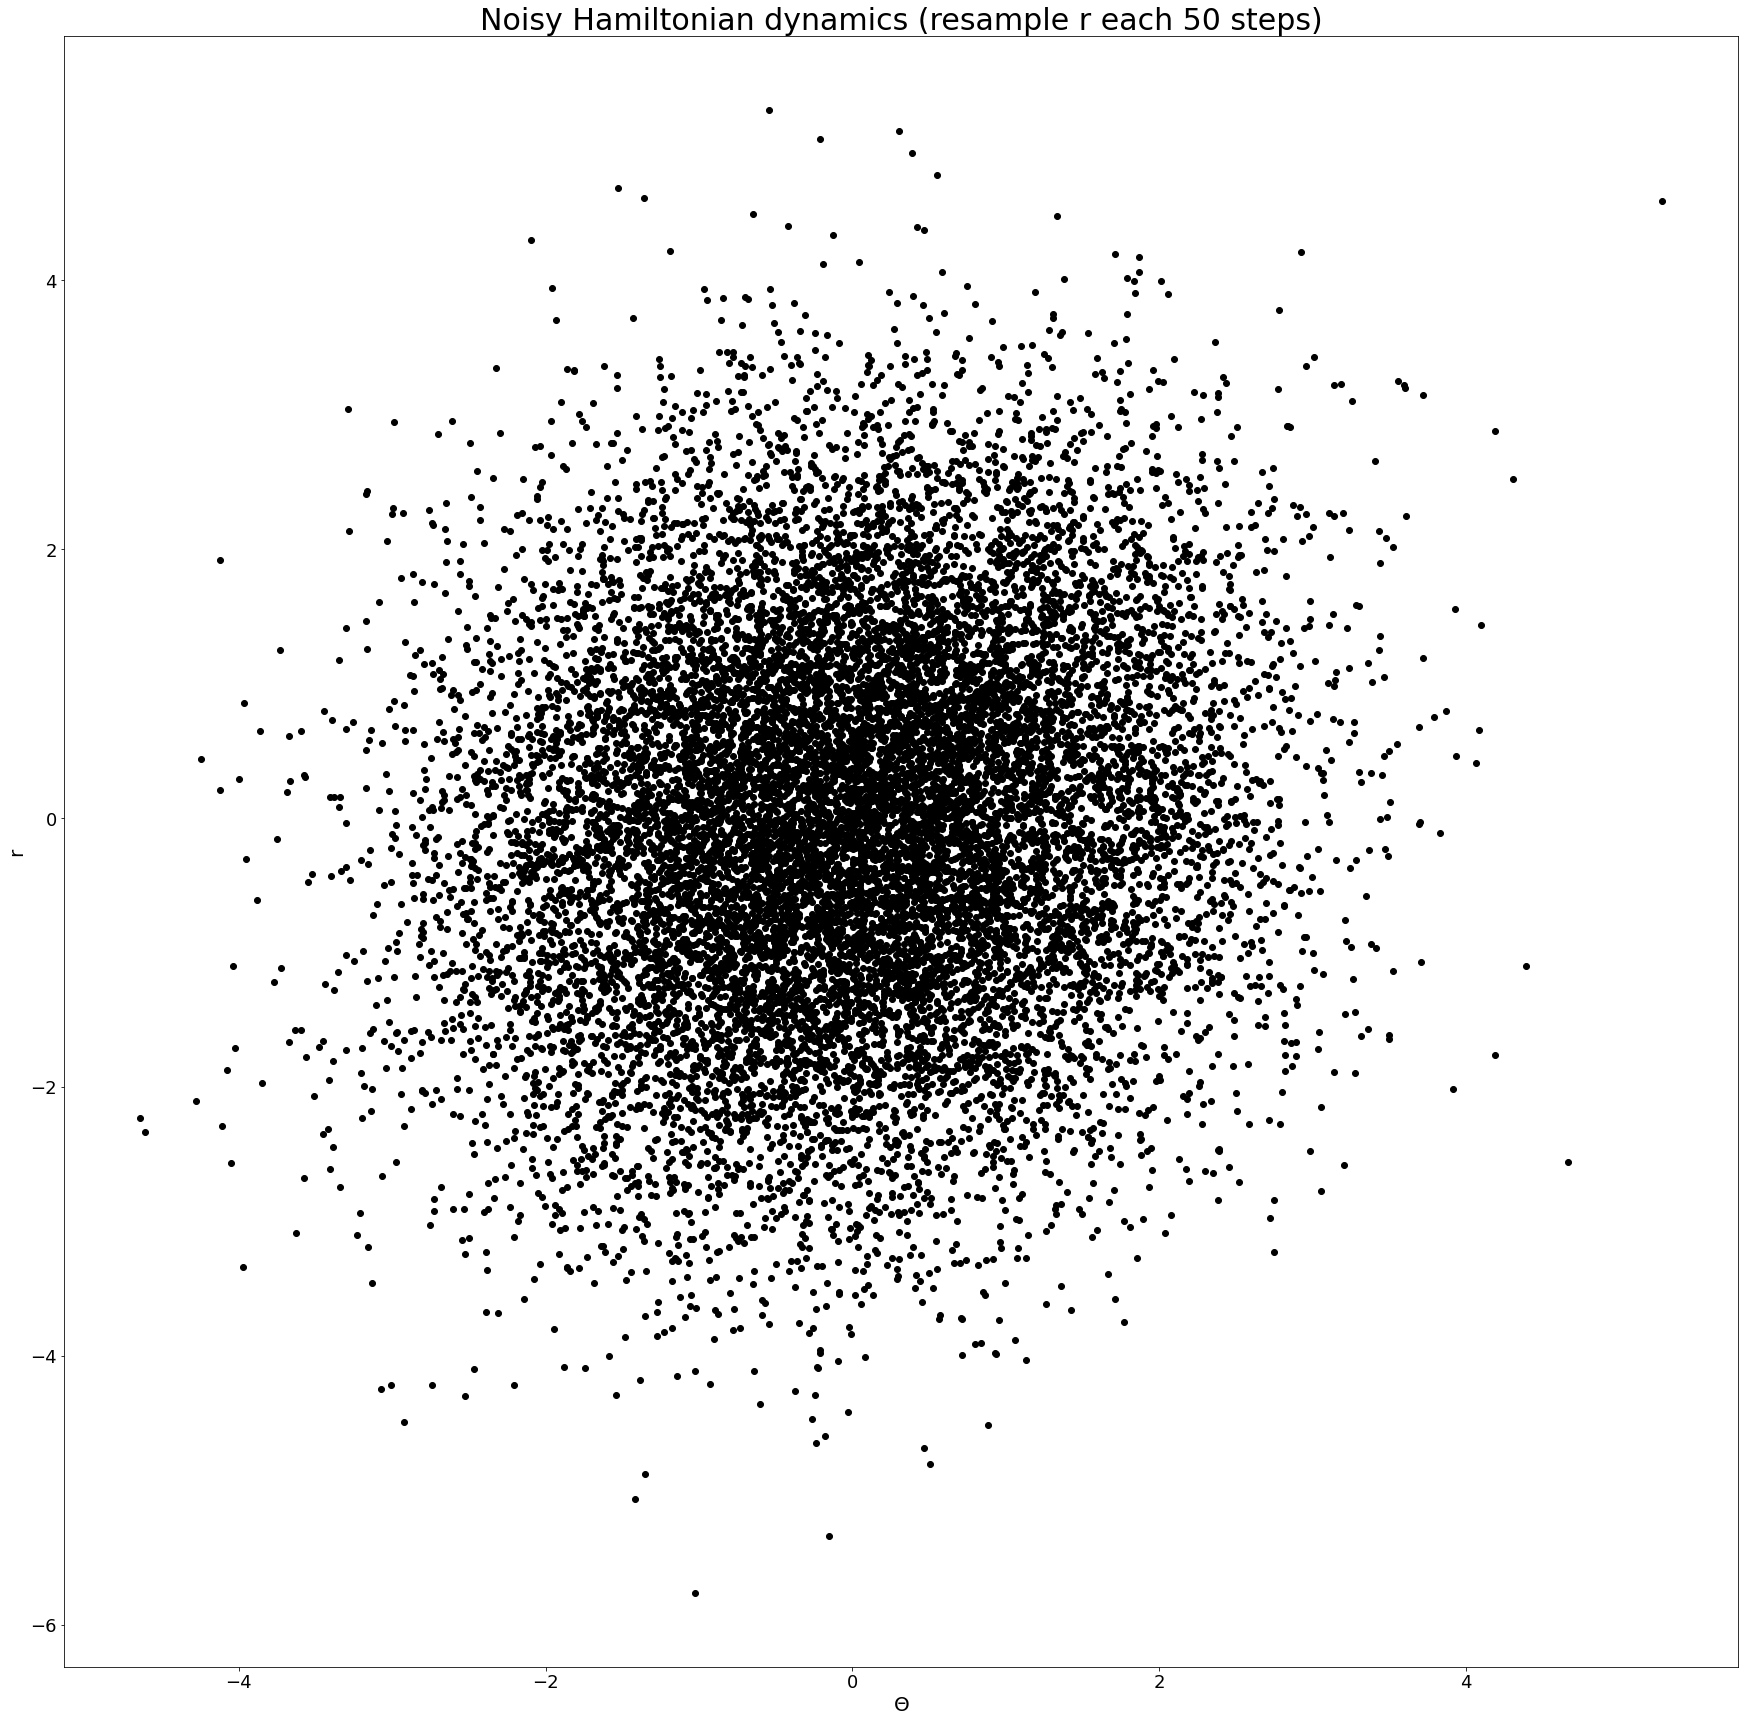

In [95]:
## Hamiltonian dynamics with noised gradient resample r each 50 steps
## Set the fig parameters
plt.title('Noisy Hamiltonian dynamics (resample r each 50 steps)', fontsize=30) # title of the fig
plt.rcParams["figure.figsize"] = [30,30] # the image size: width, length
plt.xlabel(r"${\Theta}$", fontsize=20)  # the x axis label name
plt.ylabel('r', fontsize=20)  # the x axis label name
plt.tick_params(axis='x', labelsize=18) # the x axis label size
plt.tick_params(axis='y', labelsize=18) # the y axis label size

# set random seed and variables
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))

# do leapfrog
for i in range(nstep):
    p = np.random.randn(1) * np.sqrt(m) # resample momentum r r~N(0,M)
    for j in range(niter):
        p = p - gradU(x) * dt / 2
        x = x + p / m * dt
        p = p - gradU(x) * dt / 2
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'ko')
plt.savefig('./Fig2/Fig2_HamiltonianDyNG50.jpg')
plt.show()

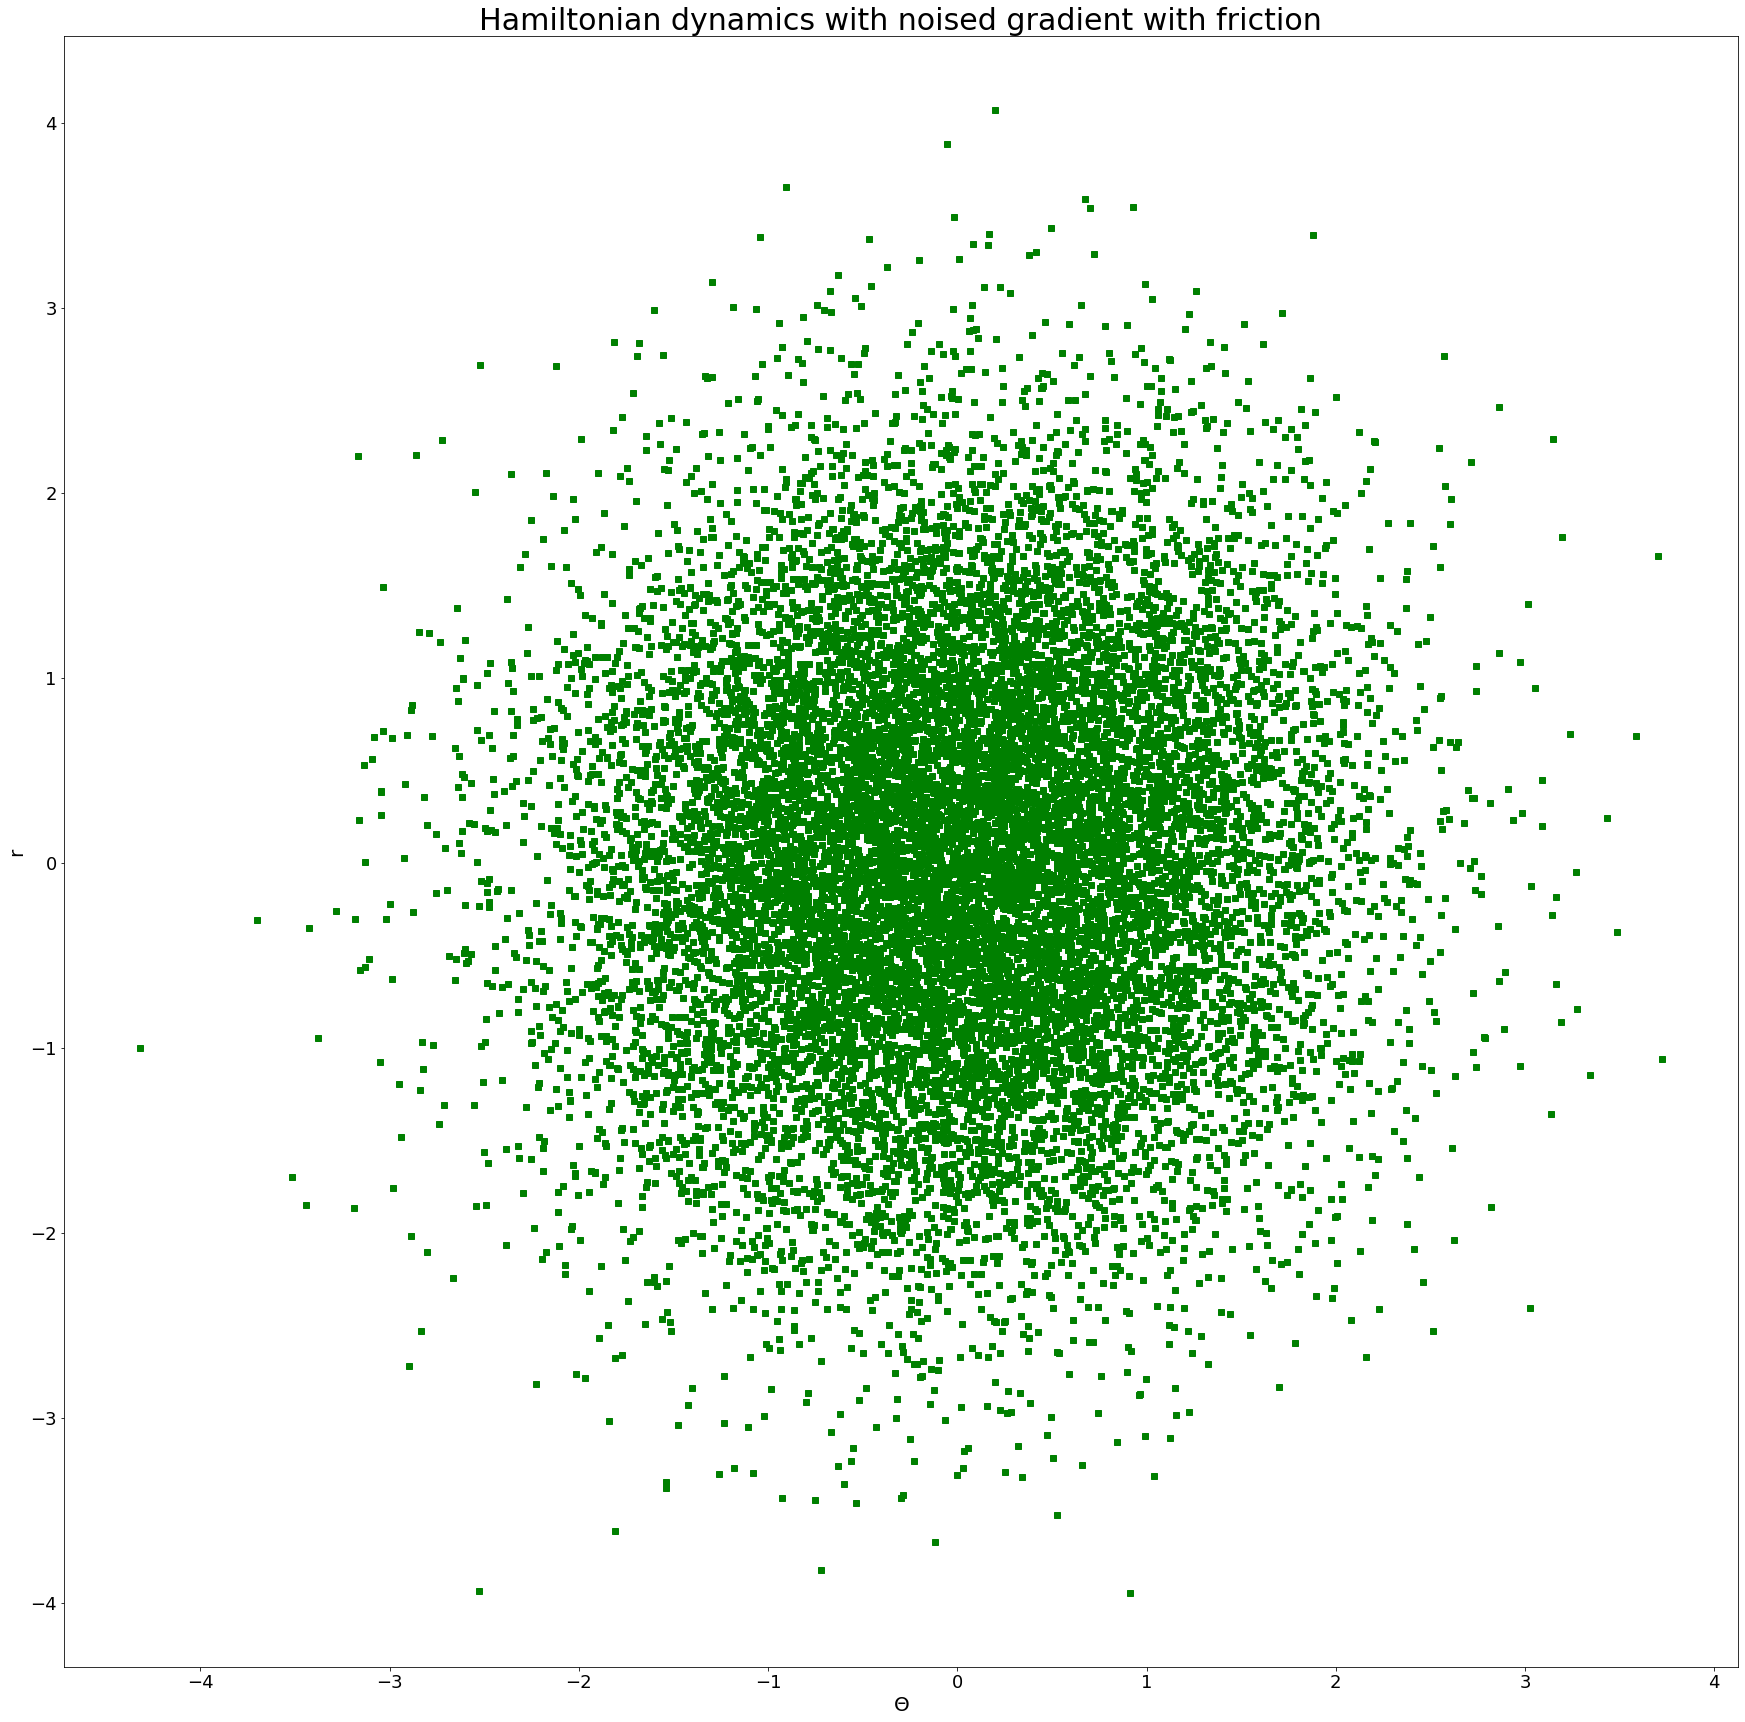

In [96]:
## Second order Langevin dynamics with noised gradient
## Hamiltonian dynamics with noised gradient with friction

## Set the fig parameters
plt.title('Hamiltonian dynamics with noised gradient with friction', fontsize=30) # title of the fig
plt.rcParams["figure.figsize"] = [30,30] # the image size: width, length
plt.xlabel(r"${\Theta}$", fontsize=20)  # the x axis label name
plt.ylabel('r', fontsize=20)  # the x axis label name
plt.tick_params(axis='x', labelsize=18) # the x axis label size
plt.tick_params(axis='y', labelsize=18) # the y axis label size

# set random seed and variables
np.random.seed(10)
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))
Bhat = 0.5 * sigma ** 2 * dt
D = np.sqrt(2 * (C - Bhat) * dt)

# do leapfrog
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p / m * dt
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'gs')
plt.savefig('./Fig2/Fig2_HamiltonianDyNGF.jpg')
plt.show()

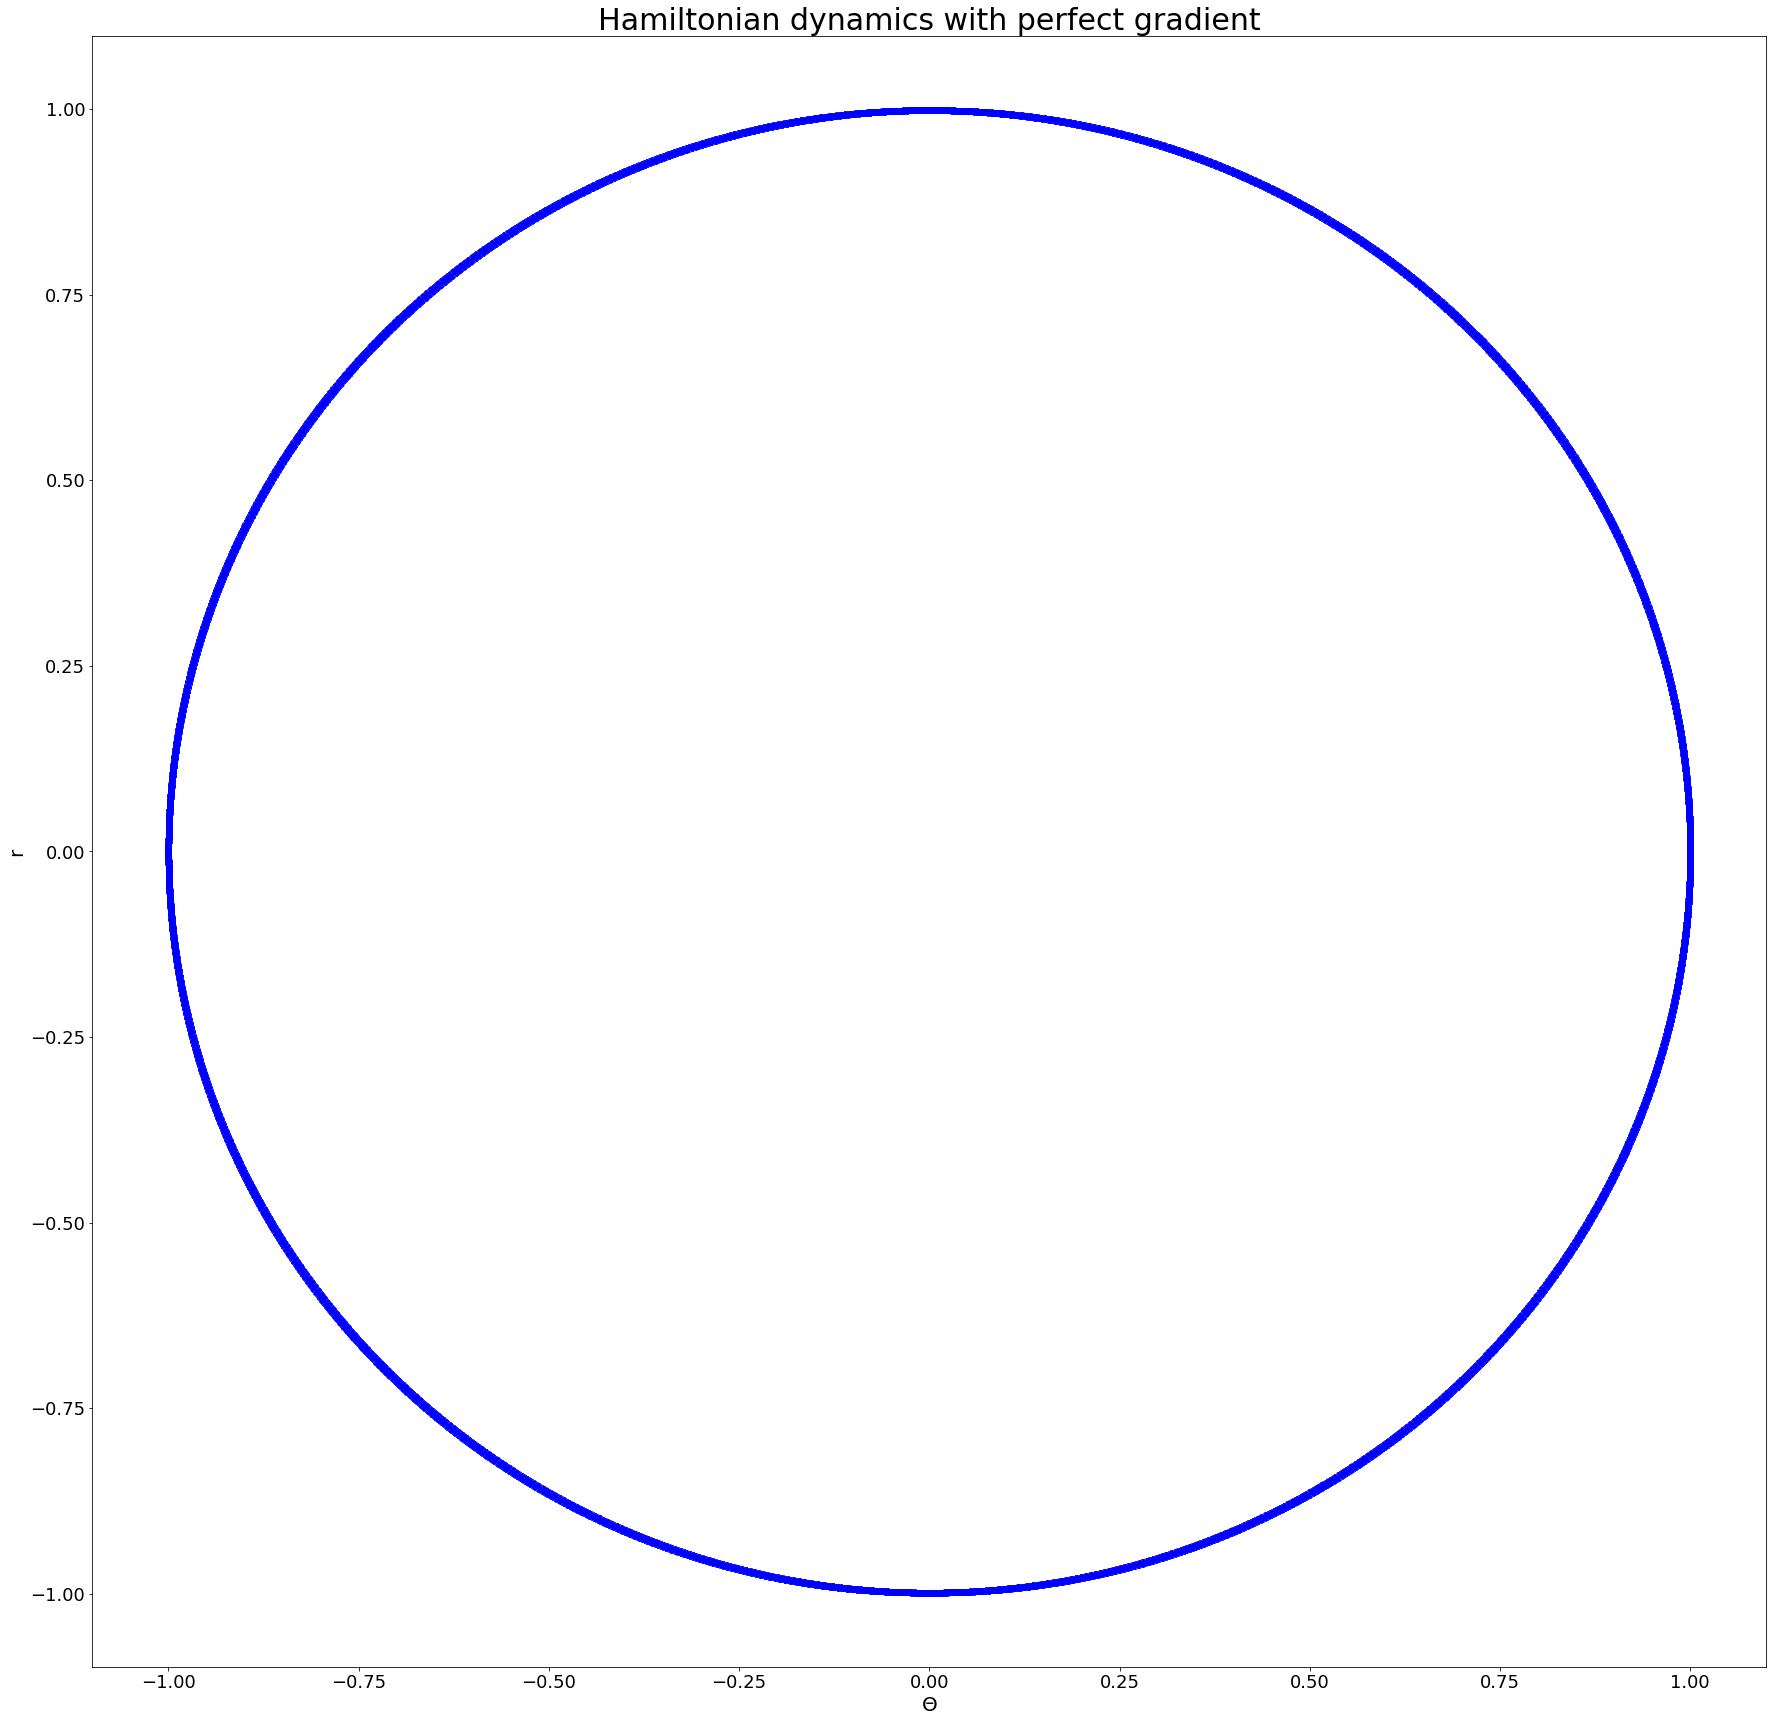

In [97]:
## Hamiltonian dynamics with perfect gradient

## Set the fig parameters
plt.title('Hamiltonian dynamics with perfect gradient', fontsize=30) # title of the fig
plt.rcParams["figure.figsize"] = [30, 30] # the image size: width, length
plt.xlabel(r"${\Theta}$", fontsize=20)  # the x axis label name
plt.ylabel('r', fontsize=20)  # the x axis label name
plt.tick_params(axis='x', labelsize=18) # the x axis label size
plt.tick_params(axis='y', labelsize=18) # the y axis label size

# set random seed and variables
np.random.seed(10)
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))

# do leapfrog
for i in range(nstep):
    for j in range(niter):
        p = p - gradUPerfect(x) * dt / 2
        x = x + p / m * dt
        p = p - gradUPerfect(x) * dt / 2
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'bx')
plt.savefig('./Fig2/Fig2_HamiltonianDyPG.jpg')
plt.show()

In [12]:
################### Reproduce the figure2 ########################
# As we can see from the above separate figs, the ranges are hugely different from each other.
# To show them in the same fig, the range of the axis should been set properly,
# which may ruin the integrity of some dynamics, like Noisy Hamiltonian dynamics.

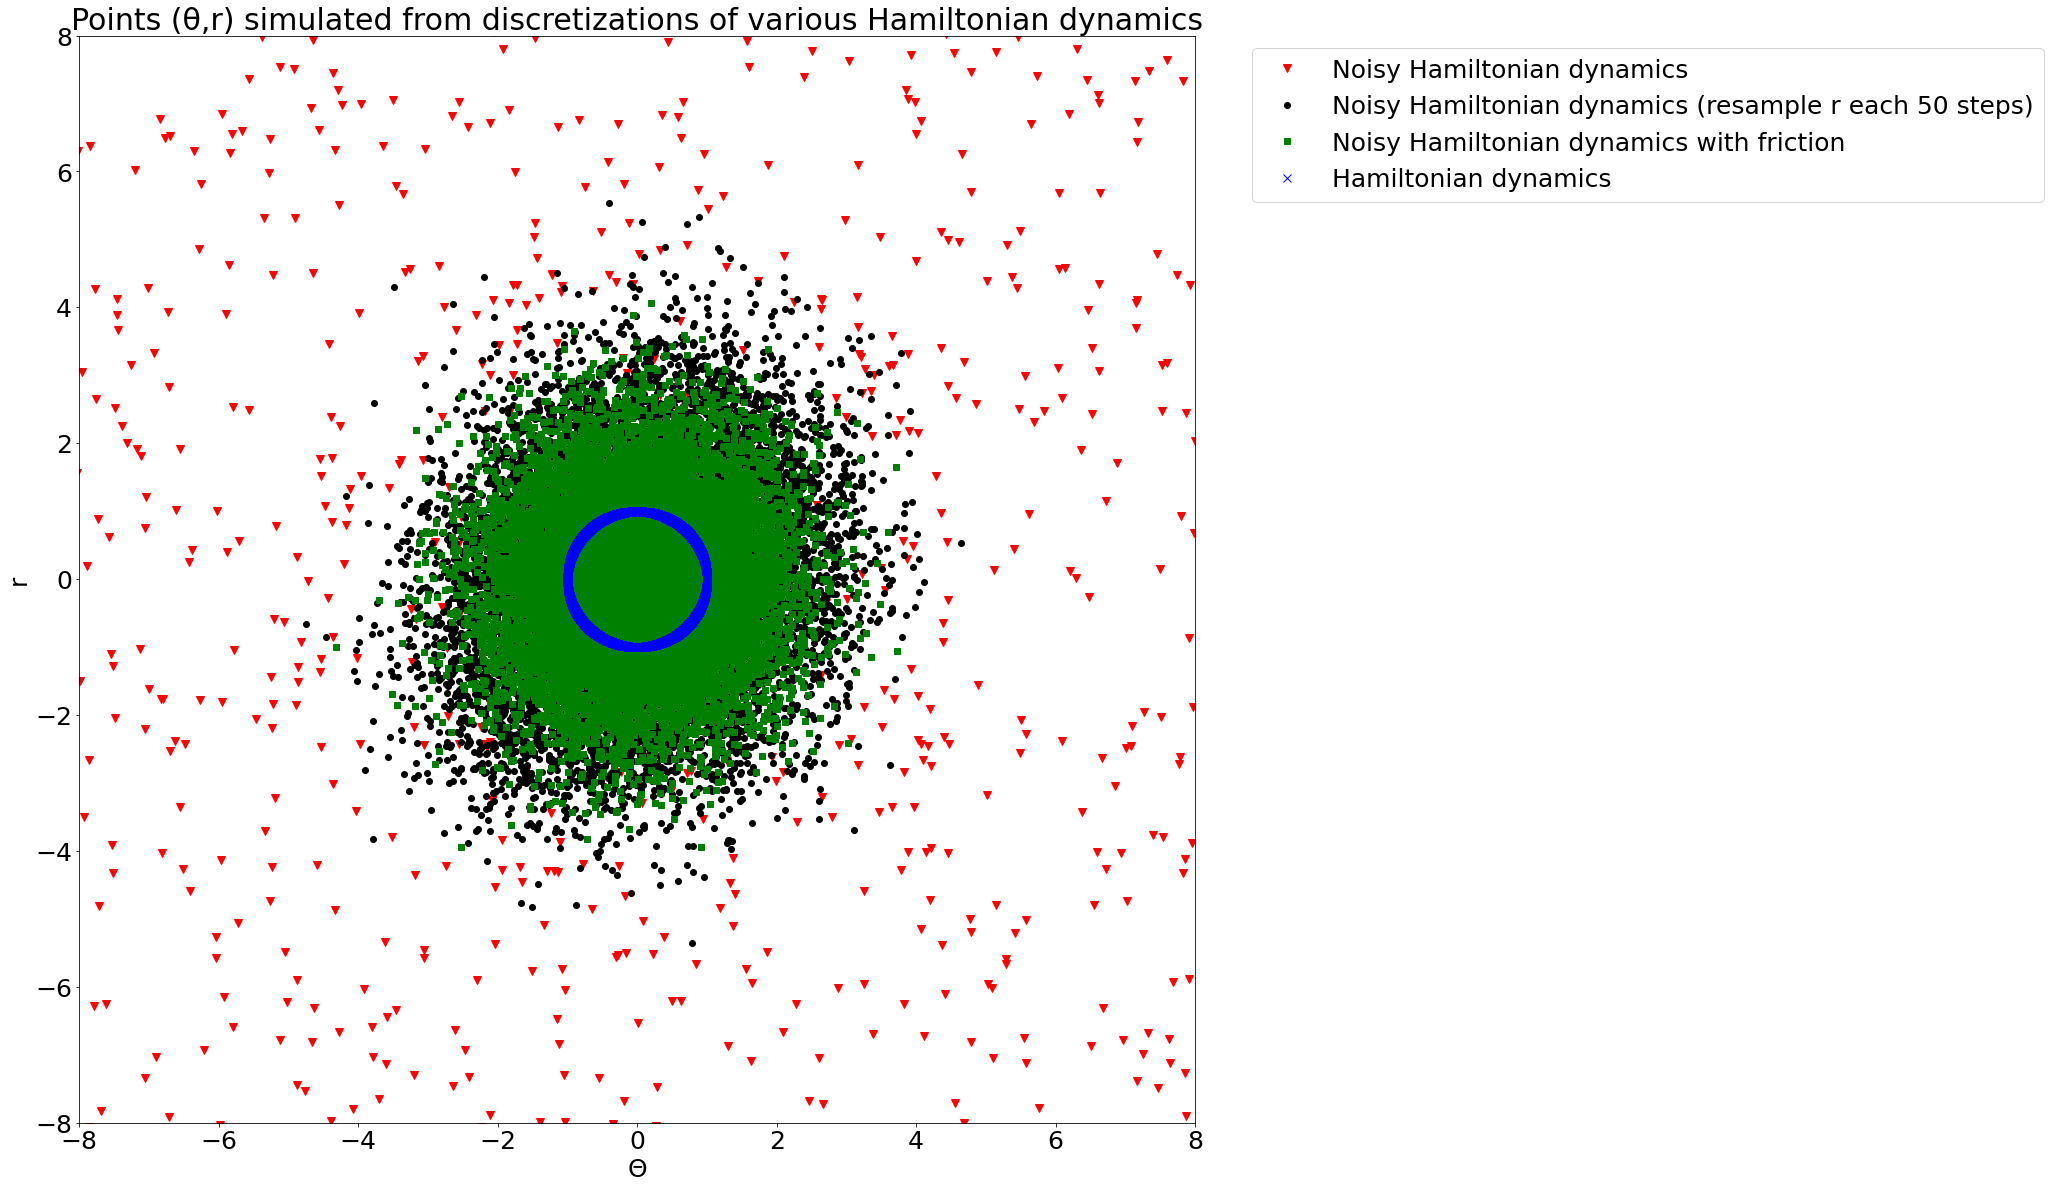

In [8]:
## Set the fig parameters
plt.title('Points (θ,r) simulated from discretizations of various Hamiltonian dynamics', fontsize=30) # title of the fig
plt.rcParams["figure.figsize"] = [20, 20] # the image size: width, length
plt.xlabel(r"${\Theta}$", fontsize=25)  # the x axis label name
plt.ylabel('r', fontsize=25)  # the x axis label name
plt.tick_params(axis='x', labelsize=25) # the x axis label size
plt.tick_params(axis='y', labelsize=25) # the y axis label size
plt.xlim([-8, 8]) # the x axis range
plt.ylim([-8, 8]) # the y axis range

## Hamiltonian dynamics with noised gradient
np.random.seed(10)
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))

# do leapfrog
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt / 2
        x = x + p / m * dt
        p = p - gradU(x) * dt / 2
    xs[i] = x
    ys[i] = p

plt.plot(xs, ys,'rv',markersize=8,label='Noisy Hamiltonian dynamics')


## Hamiltonian dynamics with noised gradient resample r each 50 steps
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))
# do leapfrog
for i in range(nstep):
    p = np.random.randn(1) * np.sqrt(m)
    for j in range(niter):
        p = p - gradU(x) * dt / 2
        x = x + p / m * dt
        p = p - gradU(x) * dt / 2
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'ko', label='Noisy Hamiltonian dynamics (resample r each 50 steps)')


## Second order Langevin dynamics with noised gradient
np.random.seed(10)
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))
Bhat = 0.5 * sigma ** 2 * dt
D = np.sqrt(2 * (C - Bhat) * dt)
# do leapfrog
for i in range(nstep):
    for j in range(niter):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p / m * dt
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'gs',label='Noisy Hamiltonian dynamics with friction')

## Hamiltonian dynamics with perfect gradient
np.random.seed(10)
x = xstart
p = pstart
xs = np.zeros((nstep,1))
ys = np.zeros((nstep,1))
# do leapfrog
for i in range(nstep):
    for j in range(niter):
        p = p - gradUPerfect(x) * dt / 2
        x = x + p / m * dt
        p = p - gradUPerfect(x) * dt / 2
    xs[i] = x
    ys[i] = p

plt.plot(xs,ys,'bx',markersize=8, label='Hamiltonian dynamics')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=25) 
plt.savefig('./Fig2/Fig2_DiscretizationsVariousHamiltonianDy.jpg', bbox_inches='tight')
plt.show()